In [1]:
import numpy as np
import torch

from script.NeuralNets.Networks import ICNN
from script.NeuralNets.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.NeuralNets.trainFunction import train_icnn_adversarial, train_icnn
from script.eval import Plots_for
from script.settings import device, data_type

In [4]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 10
batch_size = 10

number_of_adversarial_samples = 10000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

init = False


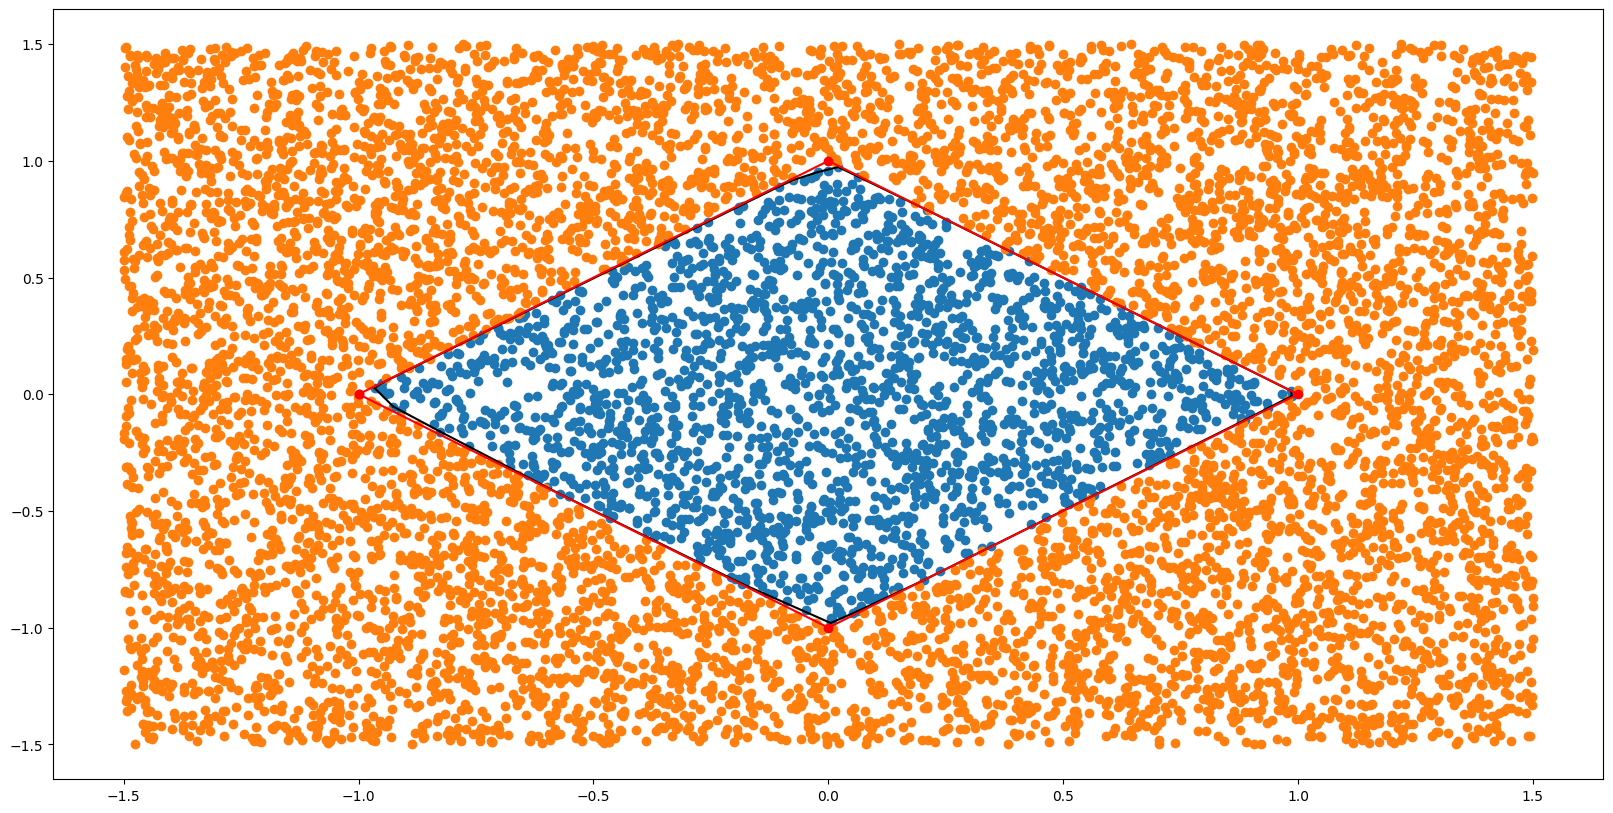

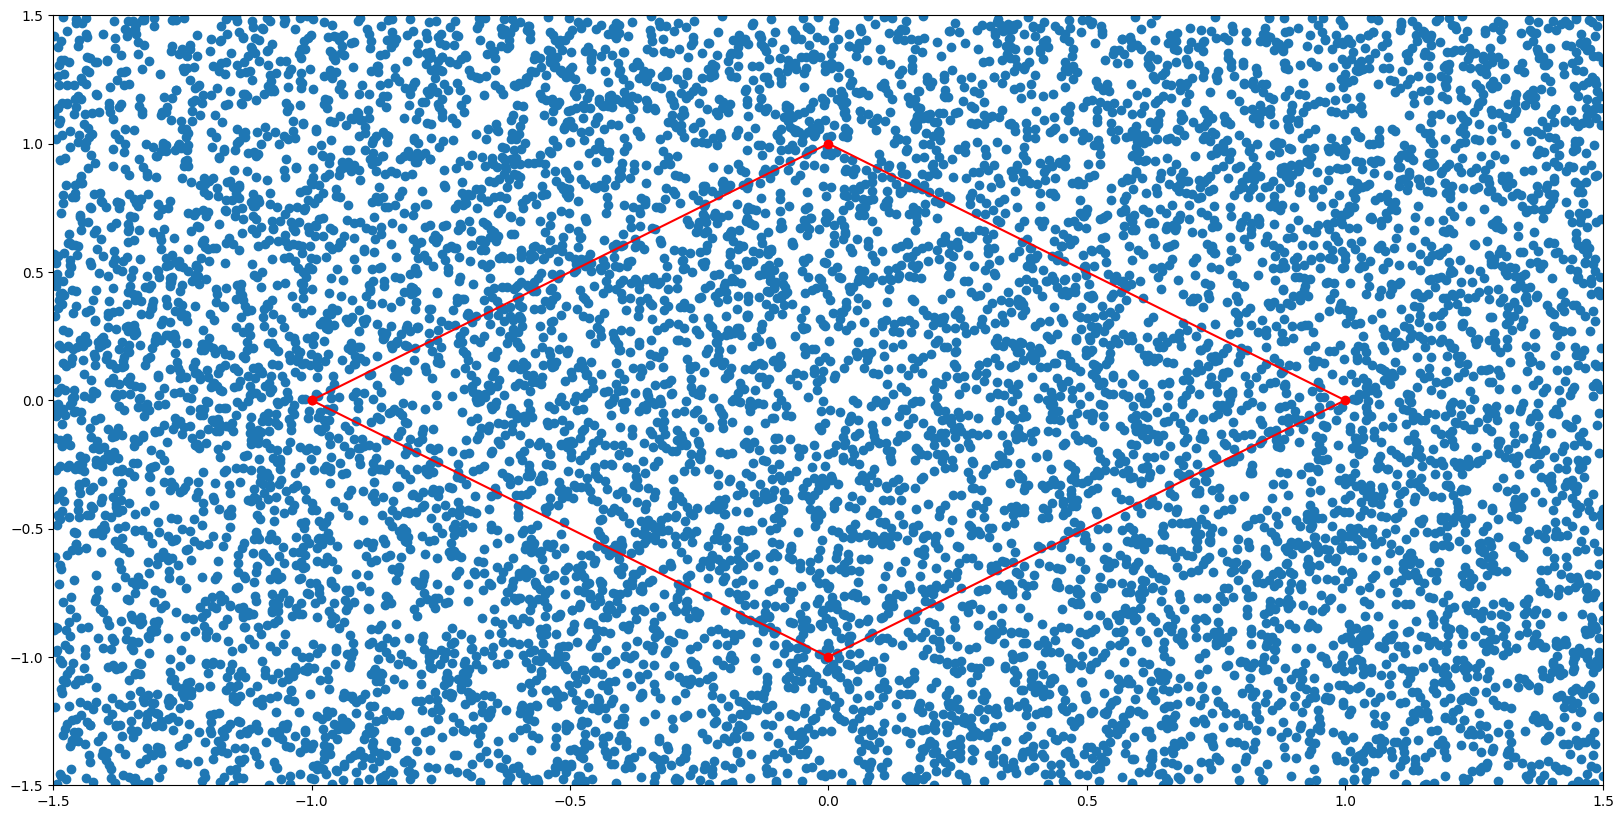

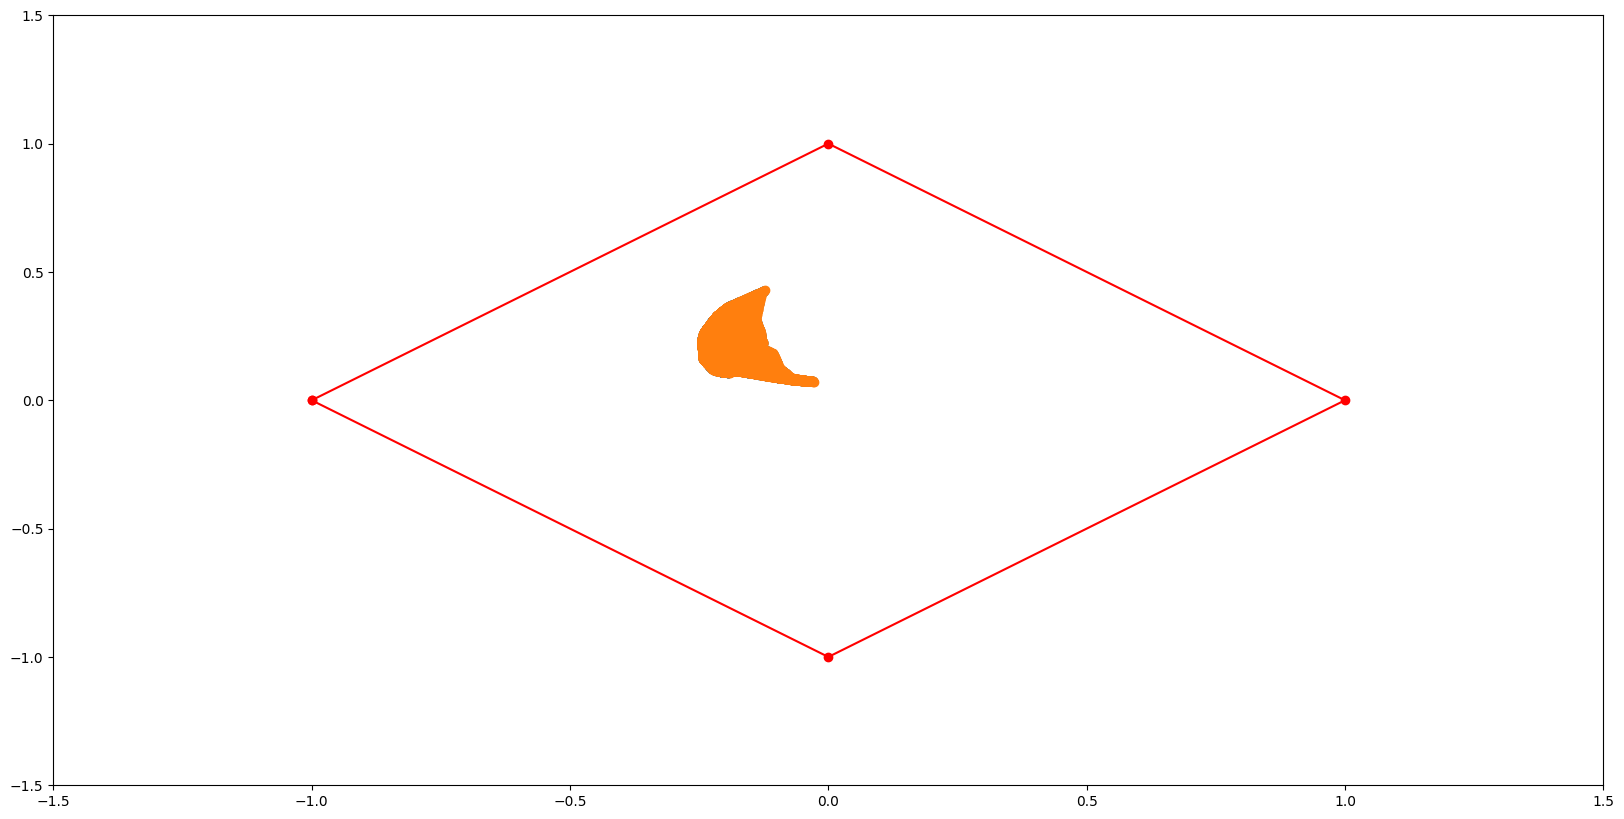

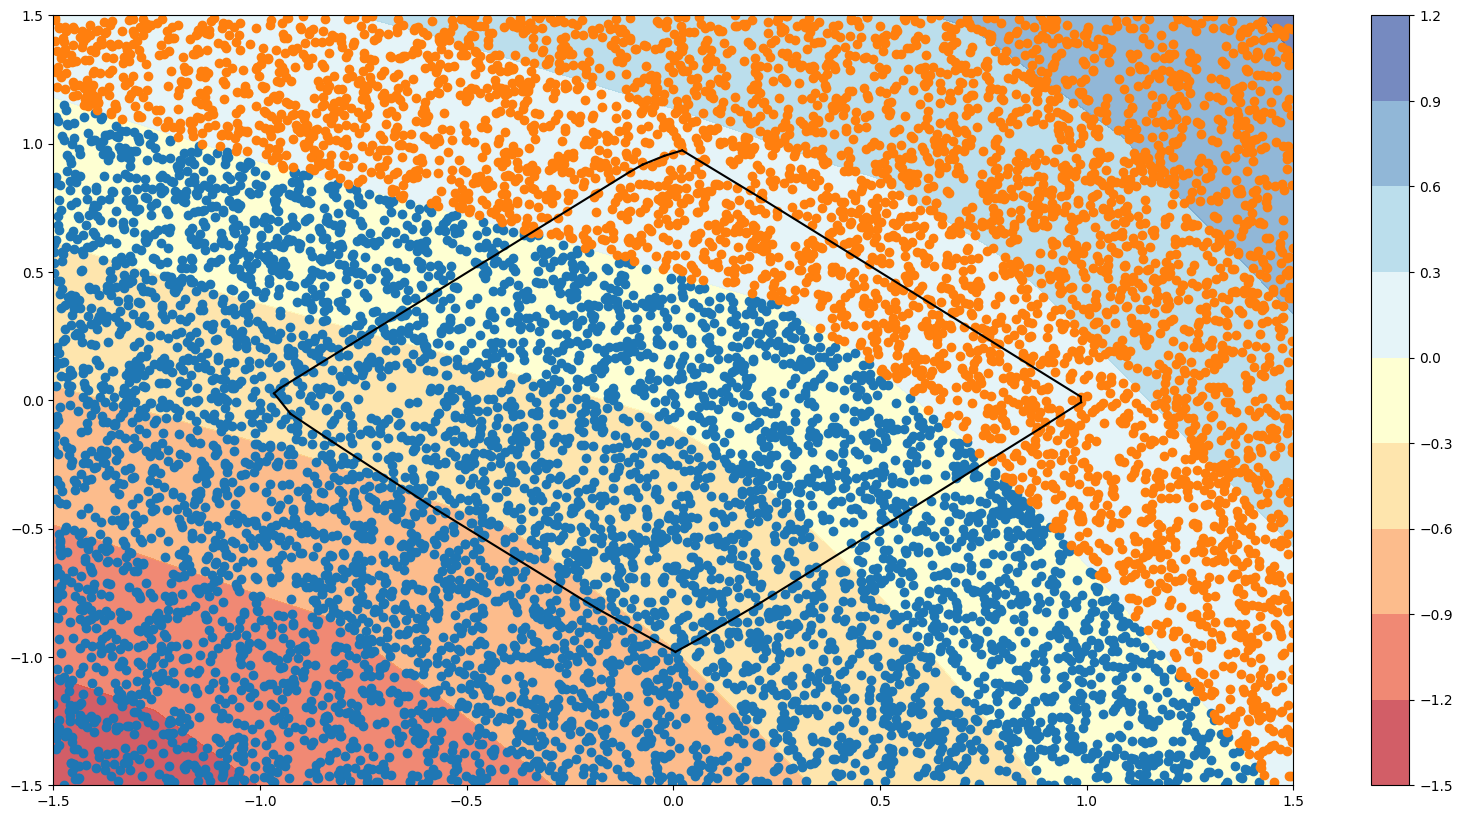

=== Epoch: 0===
batch = 0, mean loss = 13.43760316266663, l_pos = 0.6116780556413961, l_neg = 0.0, l_gen = 12.825925107025233
batch = 100, mean loss = 12.02951545377957, l_pos = 0.5999583679794912, l_neg = 0.0, l_gen = 11.429557085800075
batch = 200, mean loss = 10.187789957638447, l_pos = 0.6004312329179138, l_neg = 0.0, l_gen = 9.587358724720538
batch = 219, mean loss = 9.914247776654012, l_pos = 0.5998258995797063, l_neg = 0.0, l_gen = 9.314421877074306
=== Epoch: 1===
batch = 0, mean loss = 8.573426288682734, l_pos = 0.6251430956675005, l_neg = 0.0, l_gen = 7.948283193015233
batch = 100, mean loss = 5.920745116353251, l_pos = 0.5995379421280437, l_neg = 0.0, l_gen = 5.321207174225205
batch = 200, mean loss = 5.4530020803573525, l_pos = 0.6004289503572126, l_neg = 0.0, l_gen = 4.852573130000138
batch = 219, mean loss = 5.3690217785556795, l_pos = 0.599727180349568, l_neg = 0.0, l_gen = 4.769294598206113
=== Epoch: 2===
batch = 0, mean loss = 4.282177187084763, l_pos = 0.541178633593

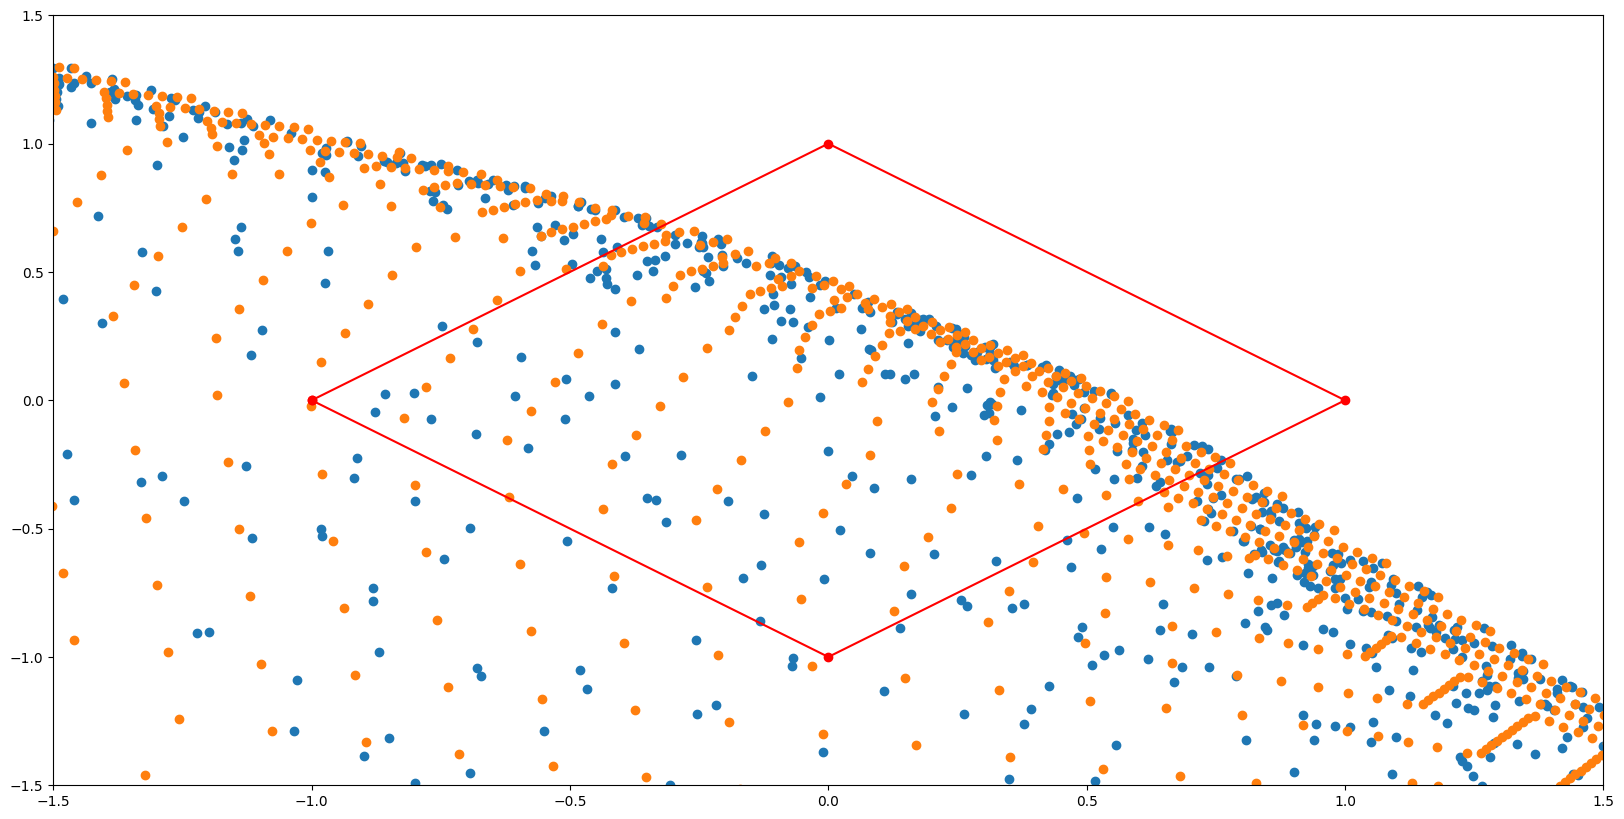

=== Epoch: 0===
batch = 0, mean loss = 2.45245503405282, l_pos = 0.5802374076275811, l_neg = 0.0, l_gen = 1.872217626425239
batch = 100, mean loss = 2.8686657712982226, l_pos = 0.5963017113084322, l_neg = 0.0, l_gen = 2.2723640599897914
batch = 200, mean loss = 2.839627920308178, l_pos = 0.6002839814859082, l_neg = 0.0, l_gen = 2.239343938822269
batch = 219, mean loss = 2.8286273840827816, l_pos = 0.5997439366838917, l_neg = 0.0, l_gen = 2.2288834473988883
=== Epoch: 1===
batch = 0, mean loss = 2.89343997278723, l_pos = 0.5492491148950194, l_neg = 0.0, l_gen = 2.344190857892211
batch = 100, mean loss = 2.8123238792763017, l_pos = 0.6019072204175627, l_neg = 0.0, l_gen = 2.2104166588587377
batch = 200, mean loss = 2.7708867498372274, l_pos = 0.5992247318398118, l_neg = 0.0, l_gen = 2.1716620179974138
batch = 219, mean loss = 2.771186878332182, l_pos = 0.599829436104317, l_neg = 0.0, l_gen = 2.1713574422278628
=== Epoch: 2===
batch = 0, mean loss = 2.48143917907464, l_pos = 0.60264978473

KeyboardInterrupt: 

In [6]:
true_extremal_points = Rhombus().get_extremal_points()
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=data_type).to(device)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)

plots = Plots_for(0, icnn, included_space, ambient_space, x_range, y_range, extr=true_extremal_points, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()

if init:
    history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, hyper_lambda=hyper_lambda)

plots.plt_mesh()

for i in range(100):
    history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, train_icnn=False, hyper_lambda=hyper_lambda, use_max_distance=True)
    if i % 10 == 0:
        print("run {}".format(i))
        plots.plt_adversarial_dotted()